<a href="https://colab.research.google.com/github/G-Aswin/GasLeakDetection/blob/main/Testing_Various_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import csv

# Load the dataset
# X = np.load('dataset.npy')
import pandas as pd
df = pd.read_csv('sample.csv', low_memory = False)
df = df.drop('DATE', axis=1)
df = df.drop('TIME', axis=1)
df = df.drop('FRAC_DAYS_SINCE_JAN1', axis=1)
df = df.drop('FRAC_HRS_SINCE_JAN1', axis=1)
df = df.drop('JULIAN_DAYS', axis=1)
df = df.drop('EPOCH_TIME', axis=1)
df = df.drop('WIND_DIRECTION', axis=1)
df = df.drop('WIND_SPEED', axis=1)
df = df.drop('WKT', axis=1)
df = df.drop('CAR_ID', axis=1)
df = df.drop('CAR_SPEED', axis=1)
df = df.drop('WS_ROTATION', axis=1)
df = df.drop('WIND_DIR_SDEV', axis=1)
df = df.drop('WIND_E', axis=1)
df = df.drop('WIND_N', axis=1)
df = df.drop('WS_SIN_HEADING', axis=1)
df = df.drop('WS_COS_HEADING', axis=1)
df = df.drop('WS_WIND_LAT', axis=1)
df = df.drop('WS_WIND_LON', axis=1)
df = df.drop('GPS_FIT', axis=1)
df = df.drop('GPS_ABS_LONG', axis=1)
df = df.drop('GPS_ABS_LAT', axis=1)

rows = df.sample(n = 5)
# X = df

X = df.to_numpy()
print(rows)


# Normalize the dataset
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Set parameters for DBSCAN algorithm
epsilon = 0.9
min_samples = 5

# Run DBSCAN algorithm
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X_norm)

# Identify outliers
outliers = np.where(clusters == -1)
print(outliers)
# print(outliers[0], len(outliers))

# Visualize results
# import matplotlib.pyplot as plt
# plt.scatter(X[:,0], X[:,1], c=clusters)
# plt.scatter(outliers[:,0], outliers[:,1], c='red')
# plt.show()

      ALARM_STATUS  INST_STATUS  CavityPressure  CavityTemp  DasTemp  \
538              0          963      140.010498   44.940727  42.6250   
2465             0          963      139.999773   44.993889  45.4375   
5871             0          963      140.031822   44.957529  44.7500   
3861             0          963      139.996414   45.000420  51.9375   
1550             0          963      140.005066   44.939995  44.3750   

      EtalonTemp  WarmBoxTemp  species  MPVPosition   OutletValve  \
538    44.744377    45.018028      2.0          0.0  28708.863281   
2465   44.737907    45.013664      2.0          0.0  28658.659539   
5871   44.738462    45.015012      2.0          0.0  28646.538795   
3861   44.731743    45.009026      2.0          0.0  28790.656250   
1550   44.737511    45.013939      2.0          0.0  28644.044757   

      solenoid_valves  CO2  CO2_dry       CH4  CH4_dry  H2O  
538               0.0  0.0      0.0  2.036458      0.0  0.0  
2465              0.0  0.0  

In [ ]:
# Isolation forest

from sklearn.ensemble import IsolationForest
import pandas as pd

# Load the dataset (assuming the dataset is stored in a CSV file)
df = pd.read_csv('sample.csv', low_memory = False)
df = df.drop('DATE', axis=1)
df = df.drop('TIME', axis=1)
df = df.drop('FRAC_DAYS_SINCE_JAN1', axis=1)
df = df.drop('FRAC_HRS_SINCE_JAN1', axis=1)
df = df.drop('JULIAN_DAYS', axis=1)
df = df.drop('EPOCH_TIME', axis=1)
df = df.drop('WIND_DIRECTION', axis=1)
df = df.drop('WIND_SPEED', axis=1)
df = df.drop('WKT', axis=1)
df = df.drop('CAR_ID', axis=1)
df = df.drop('CAR_SPEED', axis=1)
df = df.drop('WS_ROTATION', axis=1)
df = df.drop('WIND_DIR_SDEV', axis=1)
df = df.drop('WIND_E', axis=1)
df = df.drop('WIND_N', axis=1)
df = df.drop('WS_SIN_HEADING', axis=1)
df = df.drop('WS_COS_HEADING', axis=1)
df = df.drop('WS_WIND_LAT', axis=1)
df = df.drop('WS_WIND_LON', axis=1)
df = df.drop('GPS_FIT', axis=1)
df = df.drop('GPS_ABS_LONG', axis=1)
df = df.drop('GPS_ABS_LAT', axis=1)

# Specify the number of trees to use in the Isolation Forest algorithm
n_estimators = 100

# Specify the proportion of anomalies to expect in the dataset (an estimate)
contamination = 0.005

# Specify the random state to ensure reproducibility of results
random_state = 42

# Fit the Isolation Forest algorithm to the dataset
clf = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=random_state)
clf.fit(df)

# Predict the anomalies in the dataset
y_pred = clf.predict(df)

# Output the indices of the anomalies (assuming -1 is the label assigned to anomalies)
anomalies = df[y_pred == -1].index
print('Anomalies detected at indices:', anomalies)

<ipython-input-39-2a80265d9c10>:7: DtypeWarning: Columns (29,30,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sample.csv')
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomalies detected at indices: Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
              11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
              22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
              33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
              44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
              55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
              66,   67,   68,   69,   72,   73,   74,   80,   90, 6582, 6583,
            6584, 6586, 6591, 6601, 6602, 6617, 6620, 6622, 6623],
           dtype='int64')


Number of outliers detected: 128


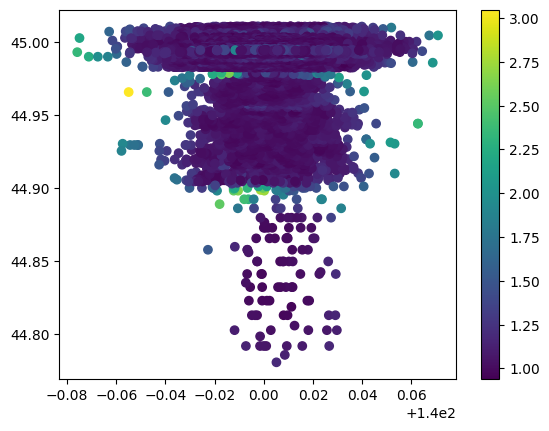

Outlier indices:
Int64Index([   56,    90,    91,    92,    93,    96,    97,    98,    99,
              100,
            ...
            15007, 15021, 15395, 15671, 15757, 15804, 16472, 16489, 16755,
            17010],
           dtype='int64', length=128)


In [ ]:
# Local Outlier Factor

import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt


# Load data from CSV
data = pd.read_csv('sample.csv', low_memory = False)

# Extract the features you want to use for anomaly detection
X = data[['CavityPressure', 'CavityTemp']].values

# Create and fit the LOF model
model = LocalOutlierFactor(n_neighbors=20, contamination='auto')
model.fit(X)

# Predict outliers
y_pred = model.fit_predict(X)

# Get the indices of the outliers
outliers = y_pred == -1
outlier_indices = data.index[outliers]

# Print the number of outliers detected
print('Number of outliers detected:', sum(outliers))

# Get the outlier values
outlier_values = X[outliers]

# Print the outlier values
# print('Outlier values:')
# print(outlier_values)

# Get the LOF scores
lof_scores = -model.negative_outlier_factor_

# Create a scatter plot with LOF scores
plt.scatter(X[:, 0], X[:, 1], c=lof_scores)
plt.colorbar()
plt.show()

print('Outlier indices:')
print(outlier_indices)



Number of outliers detected: 212


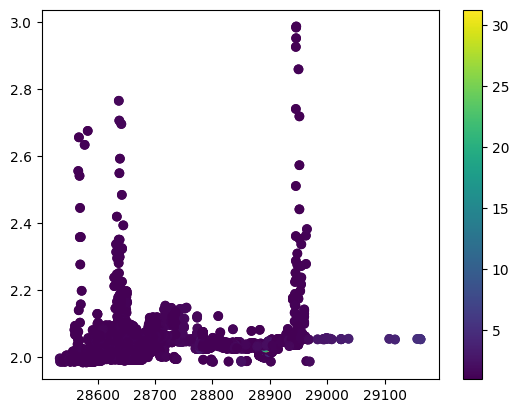

Outlier indices:
Int64Index([ 148,  149,  151,  152, 1146, 1147, 1151, 1172, 1174, 1175,
            ...
            8096, 8097, 8107, 8116, 8124, 8134, 8135, 8136, 8161, 8162],
           dtype='int64', length=212)


In [14]:
# Local Outlier Factor

import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt


# Load data from CSV
data = pd.read_csv('sample.csv', low_memory = False)

# Extract the features you want to use for anomaly detection
X = data[['OutletValve', 'CH4']].values

# Create and fit the LOF model
model = LocalOutlierFactor(n_neighbors=50, contamination='auto')
model.fit(X)

# Predict outliers
y_pred = model.fit_predict(X)

# Get the indices of the outliers
outliers = y_pred == -1
outlier_indices = data.index[outliers]

# Print the number of outliers detected
print('Number of outliers detected:', sum(outliers))

# Get the outlier values
outlier_values = X[outliers]

# Get the LOF scores
lof_scores = -model.negative_outlier_factor_

# Create a scatter plot with LOF scores
plt.scatter(X[:, 0], X[:, 1], c=lof_scores)
plt.colorbar()
plt.show()

print('Outlier indices:')
print(outlier_indices)



Number of outliers detected: 470


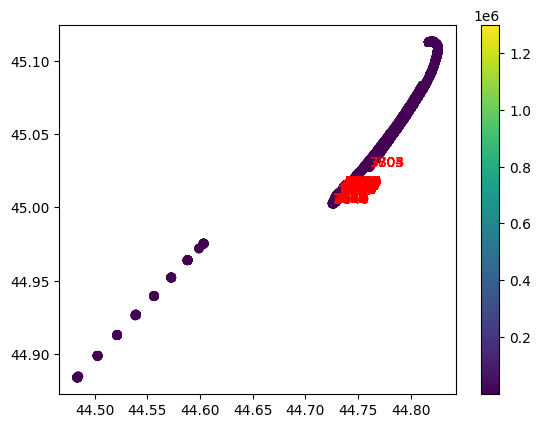

Outlier indices:
Int64Index([ 926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
            ...
            8171, 8172, 8173, 8174, 8175, 8176, 8177, 8178, 8179, 8180],
           dtype='int64', length=470)


In [15]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('sample.csv', low_memory = False)

# Extract the features you want to use for anomaly detection
X = data[['EtalonTemp', 'WarmBoxTemp']].values

# Create and fit the LOF model
model = LocalOutlierFactor(n_neighbors=50, contamination='auto')
model.fit(X)

# Predict outliers
y_pred = model.fit_predict(X)

# Get the indices of the outliers
outliers = y_pred == -1
outlier_indices = data.index[outliers]

# Print the number of outliers detected
print('Number of outliers detected:', sum(outliers))

# Get the outlier values
outlier_values = X[outliers]

# Get the LOF scores
lof_scores = -model.negative_outlier_factor_

# Create a scatter plot with LOF scores
plt.scatter(X[:, 0], X[:, 1], c=lof_scores)
plt.colorbar()

# Label the outlier points
for i in range(len(outlier_indices)):
    plt.text(X[outlier_indices[i], 0], X[outlier_indices[i], 1], outlier_indices[i], fontsize=10, color='red')

plt.show()

print('Outlier indices:')
print(outlier_indices)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of outliers detected: 142


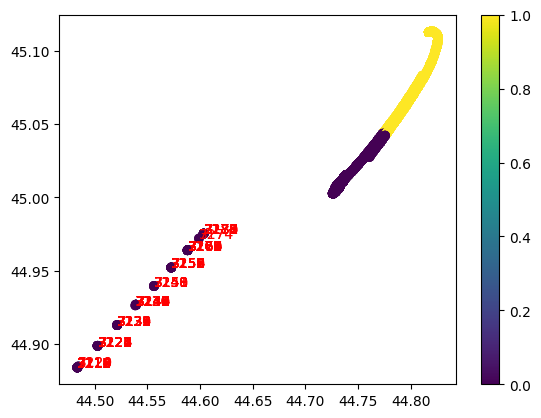

Outlier indices:
[3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123 3124 3125
 3126 3127 3128 3129 3130 3131 3132 3133 3134 3135 3136 3137 3138 3139
 3140 3141 3142 3143 3144 3145 3146 3147 3148 3149 3150 3151 3152 3153
 3154 3155 3156 3157 3158 3159 3160 3161 3162 3163 3164 3165 3166 3167
 3168 3169 3170 3171 3172 3173 3174 3175 3176 3177 3178 3179 3180 3181
 3182 7212 7213 7214 7215 7216 7217 7218 7219 7220 7221 7222 7223 7224
 7225 7226 7227 7228 7229 7230 7231 7232 7233 7234 7235 7236 7237 7238
 7239 7240 7241 7242 7243 7244 7245 7246 7247 7248 7249 7250 7251 7252
 7253 7254 7255 7256 7257 7258 7259 7260 7261 7262 7263 7264 7265 7266
 7267 7268 7269 7270 7271 7272 7273 7274 7275 7276 7277 7278 7279 7280
 7281 7282]


In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('sample.csv', low_memory=False)

# Extract the features you want to use for anomaly detection
X = data[['EtalonTemp', 'WarmBoxTemp']].values

# Create and fit the K-means model
model = KMeans(n_clusters=2, random_state=0)
model.fit(X)

# Predict cluster labels
y_pred = model.predict(X)

# Calculate distances to the nearest centroid
distances = model.transform(X)

# Calculate the average distance to the nearest centroid for each point
avg_distances = distances.min(axis=1)

# Define a threshold for outlier detection
threshold = 2.5 * avg_distances.std()

# Get the indices of the outlier points
outlier_indices = (avg_distances > threshold).nonzero()[0]

# Print the number of outliers detected
print('Number of outliers detected:', len(outlier_indices))

# Create a scatter plot with cluster labels and outlier points
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.colorbar()

# Label the outlier points
for i in range(len(outlier_indices)):
    plt.text(X[outlier_indices[i], 0], X[outlier_indices[i], 1], outlier_indices[i], fontsize=10, color='red')

plt.show()

print('Outlier indices:')
print(outlier_indices)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of outliers detected: 482


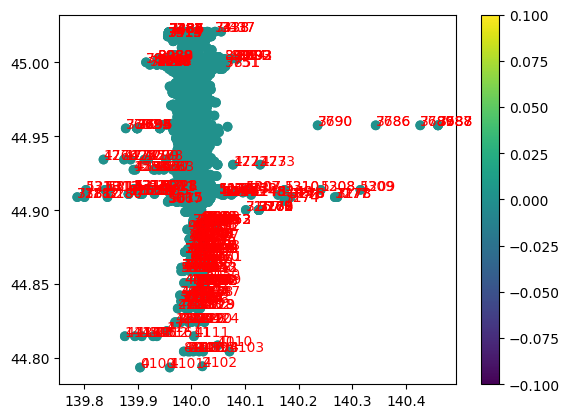

Outlier indices:
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   98  100
  101  157  158  159  160  163  172  173  175  176  177  178  179  967
 1015 1144 1145 1146 1147 1148 1149 1151 1152 1153 1154 1155 1170 1172
 1173 1174 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218
 1221 3026 3028 3029 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121
 3122 3123 3124 3125 3126 3127 3128 3129 3130 3131 3132 3133 3134 3135
 3136 3137 3138 3139 3140 3141 3142 3143 3144 3145 3146 3147 3148 3149
 3150 3151 3152 3153 3154 3155 3156 3157 3158 3159 3167 3168

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('sample.csv', low_memory=False)

# Extract the features you want to use for anomaly detection
X = data[['CavityPressure', 'CavityTemp']].values

# Create and fit the K-means model
model = KMeans(n_clusters=1, random_state=0)
model.fit(X)

# Predict cluster labels
y_pred = model.predict(X)

# Calculate distances to the nearest centroid
distances = model.transform(X)

# Calculate the average distance to the nearest centroid for each point
avg_distances = distances.min(axis=1)

# Define a threshold for outlier detection
threshold = 2.5 * avg_distances.std()

# Get the indices of the outlier points
outlier_indices = (avg_distances > threshold).nonzero()[0]

# Print the number of outliers detected
print('Number of outliers detected:', len(outlier_indices))

# Create a scatter plot with cluster labels and outlier points
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.colorbar()

# Label the outlier points
for i in range(len(outlier_indices)):
    plt.text(X[outlier_indices[i], 0], X[outlier_indices[i], 1], outlier_indices[i], fontsize=10, color='red')

plt.show()

print('Outlier indices:')
print(outlier_indices)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of outliers detected: 956


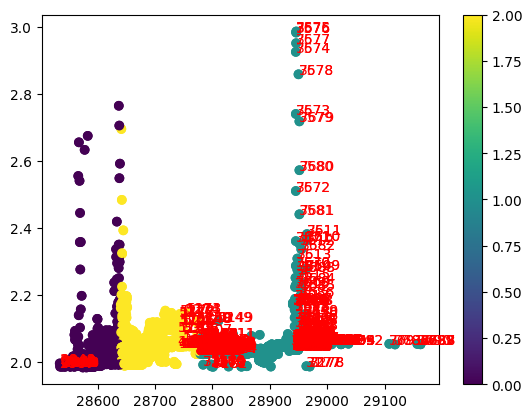

Outlier indices:
[ 148  149  150  151  152  153  154  155  156  171  172  173  174 1146
 1147 1148 1149 1150 1151 1172 1173 1174 1175 1193 1205 1206 1207 1211
 1212 1213 2848 2849 2902 2906 2907 2908 2909 2910 2914 2915 2916 3063
 3167 3168 3169 3170 3171 3172 3173 3177 3178 3182 3488 3489 3490 3491
 3492 3493 3494 3495 3496 3497 3498 3499 3500 3501 3502 3503 3504 3505
 3506 3507 3508 3509 3510 3511 3512 3513 3514 3515 3516 3517 3518 3519
 3520 3521 3522 3525 3526 3527 3528 3529 3530 3531 3532 3533 3534 3535
 3536 3537 3538 3540 3541 3542 3543 3544 3545 3546 3547 3548 3549 3550
 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560 3561 3562 3563 3564
 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3576 3577 3578
 3579 3580 3581 3582 3583 3584 3585 3586 3587 3588 3589 3590 3591 3592
 3593 3594 3598 3599 3600 3601 3602 3604 3605 3606 3607 3608 3609 3610
 3611 3613 3614 3615 3616 3617 3618 3619 3620 3621 3622 3623 3624 3625
 3626 3627 3628 3629 3630 3631 3632 3633 3634 3635 3636 3637

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('sample.csv', low_memory=False)

# Extract the features you want to use for anomaly detection
X = data[['OutletValve', 'CH4']].values

# Create and fit the K-means model
model = KMeans(n_clusters=3, random_state=0)
model.fit(X)

# Predict cluster labels
y_pred = model.predict(X)

# Calculate distances to the nearest centroid
distances = model.transform(X)

# Calculate the average distance to the nearest centroid for each point
avg_distances = distances.min(axis=1)

# Define a threshold for outlier detection
threshold = 2.5 * avg_distances.std()

# Get the indices of the outlier points
outlier_indices = (avg_distances > threshold).nonzero()[0]

# Print the number of outliers detected
print('Number of outliers detected:', len(outlier_indices))

# Create a scatter plot with cluster labels and outlier points
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.colorbar()

# Label the outlier points
for i in range(len(outlier_indices)):
    plt.text(X[outlier_indices[i], 0], X[outlier_indices[i], 1], outlier_indices[i], fontsize=10, color='red')

plt.show()

print('Outlier indices:')
print(outlier_indices)

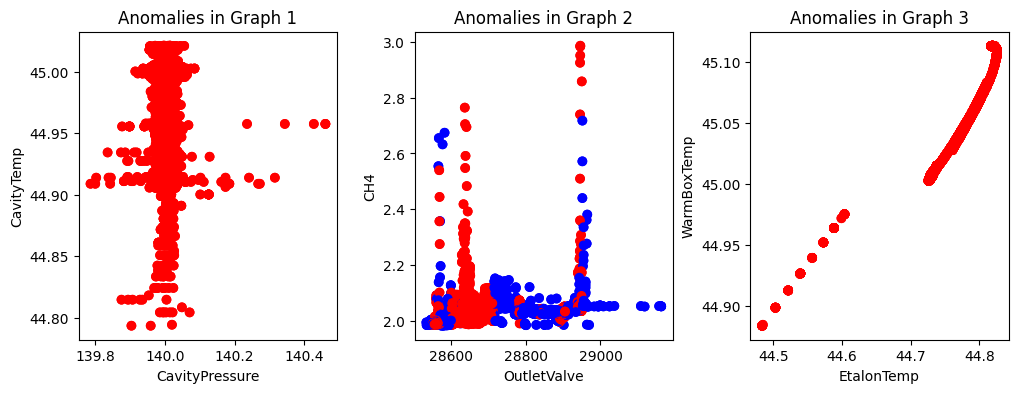

In [63]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('sample.csv')

# Select the attributes for the three graphs
graph1 = data[['CavityPressure', 'CavityTemp']]
graph2 = data[['OutletValve', 'CH4']]
graph3 = data[['EtalonTemp', 'WarmBoxTemp']]

# Perform DBScan clustering on each graph
dbscan = DBSCAN(eps=0.99, min_samples=50)

labels1 = dbscan.fit_predict(graph1)
labels2 = dbscan.fit_predict(graph2)
labels3 = dbscan.fit_predict(graph3)

# Plot the anomalies for each graph
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

anomaly_color = 'red'

axs[0].scatter(graph1.iloc[:,0], graph1.iloc[:,1], c=['blue' if label == -1 else anomaly_color for label in labels1])
axs[0].set_xlabel('CavityPressure')
axs[0].set_ylabel('CavityTemp')
axs[0].set_title('Anomalies in Graph 1')

axs[1].scatter(graph2.iloc[:,0], graph2.iloc[:,1], c=['blue' if label == -1 else anomaly_color for label in labels2])
axs[1].set_xlabel('OutletValve')
axs[1].set_ylabel('CH4')
axs[1].set_title('Anomalies in Graph 2')

axs[2].scatter(graph3.iloc[:,0], graph3.iloc[:,1], c=['blue' if label == -1 else anomaly_color for label in labels3])
axs[2].set_xlabel('EtalonTemp')
axs[2].set_ylabel('WarmBoxTemp')
axs[2].set_title('Anomalies in Graph 3')

plt.show()

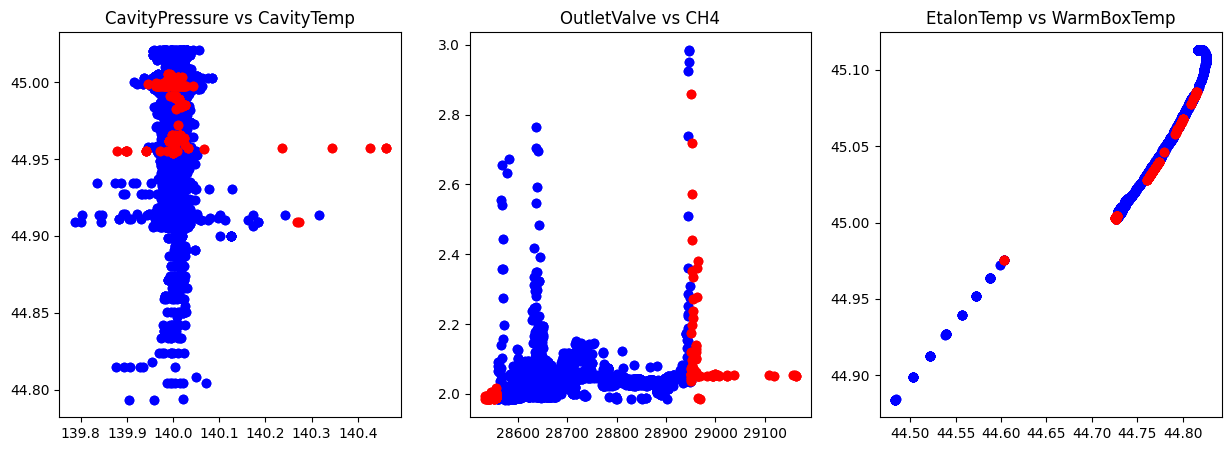

In [59]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv("sample.csv")

# Extract the columns of interest
data = df[['CavityPressure', 'CavityTemp', 'OutletValve', 'CH4', 'EtalonTemp', 'WarmBoxTemp']].values

# Create the One-Class SVM model
model = svm.OneClassSVM(kernel='rbf', nu=0.05)

# Fit the model to the data
model.fit(data)

# Predict the labels for the data
labels = model.predict(data)

# Plot the data points with anomalies marked in red
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(data[labels==1, 0], data[labels==1, 1], c='blue')
plt.scatter(data[labels==-1, 0], data[labels==-1, 1], c='red')
plt.title('CavityPressure vs CavityTemp')

plt.subplot(1,3,2)
plt.scatter(data[labels==1, 2], data[labels==1, 3], c='blue')
plt.scatter(data[labels==-1, 2], data[labels==-1, 3], c='red')
plt.title('OutletValve vs CH4')

plt.subplot(1,3,3)
plt.scatter(data[labels==1, 4], data[labels==1, 5], c='blue')
plt.scatter(data[labels==-1, 4], data[labels==-1, 5], c='red')
plt.title('EtalonTemp vs WarmBoxTemp')

plt.show()


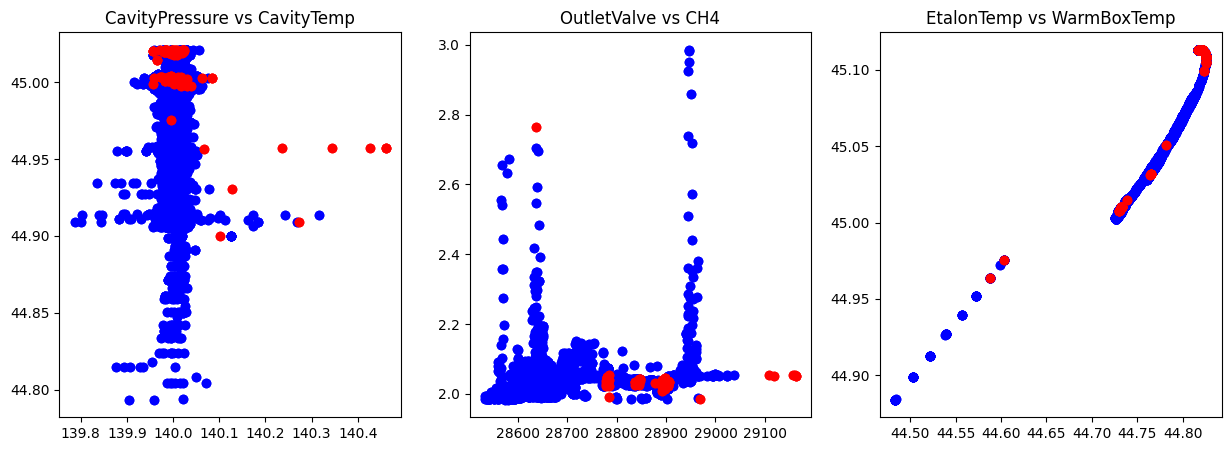

In [72]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv("sample.csv")

# Extract the columns of interest
data = df[['CavityPressure', 'CavityTemp', 'OutletValve', 'CH4', 'EtalonTemp', 'WarmBoxTemp']].values

# Create the LOF model
model = LocalOutlierFactor(n_neighbors=30, contamination=0.02)

# Fit the model to the data and get the predicted labels
labels = model.fit_predict(data)

# Plot the data points with anomalies marked in red
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(data[labels==1, 0], data[labels==1, 1], c='blue')
plt.scatter(data[labels==-1, 0], data[labels==-1, 1], c='red')
plt.title('CavityPressure vs CavityTemp')

plt.subplot(1,3,2)
plt.scatter(data[labels==1, 2], data[labels==1, 3], c='blue')
plt.scatter(data[labels==-1, 2], data[labels==-1, 3], c='red')
plt.title('OutletValve vs CH4')

plt.subplot(1,3,3)
plt.scatter(data[labels==1, 4], data[labels==1, 5], c='blue')
plt.scatter(data[labels==-1, 4], data[labels==-1, 5], c='red')
plt.title('EtalonTemp vs WarmBoxTemp')

plt.show()


Epoch 1/100
257/257 [==============================] - 1s 3ms/step - loss: 1.2430
Epoch 2/100
257/257 [==============================] - 0s 2ms/step - loss: 1.1179
Epoch 3/100
257/257 [==============================] - 0s 1ms/step - loss: 1.0421
Epoch 4/100
257/257 [==============================] - 0s 1ms/step - loss: 0.9910
Epoch 5/100
257/257 [==============================] - 0s 1ms/step - loss: 0.9527
Epoch 6/100
257/257 [==============================] - 0s 1ms/step - loss: 0.9202
Epoch 7/100
257/257 [==============================] - 0s 1ms/step - loss: 0.8862
Epoch 8/100
257/257 [==============================] - 0s 1ms/step - loss: 0.8580
Epoch 9/100
257/257 [==============================] - 0s 1ms/step - loss: 0.8408
Epoch 10/100
257/257 [==============================] - 0s 2ms/step - loss: 0.8291
Epoch 11/100
257/257 [==============================] - 0s 2ms/step - loss: 0.8198
Epoch 12/100
257/257 [==============================] - 0s 1ms/step - loss: 0.8120
Epoch 13/100


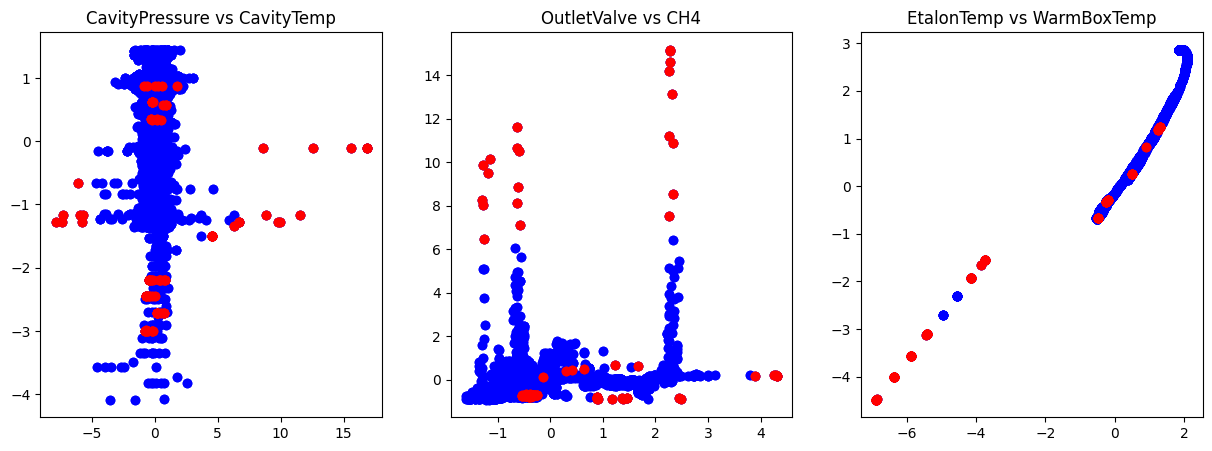

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load data from CSV file
df = pd.read_csv("sample.csv")

# Extract the columns of interest
data = df[['CavityPressure', 'CavityTemp', 'OutletValve', 'CH4', 'EtalonTemp', 'WarmBoxTemp']].values

# Scale the data using StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Define the autoencoder model architecture
input_dim = data.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the data
autoencoder.fit(data, data, epochs=100, batch_size=32)

# Use the trained autoencoder to reconstruct the data and calculate reconstruction errors
reconstructions = autoencoder.predict(data)
errors = np.mean(np.square(data - reconstructions), axis=1)

# Plot the data points with anomalies marked in red
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(data[:,0], data[:,1], c='blue')
plt.scatter(data[errors > np.percentile(errors, 98), 0], data[errors > np.percentile(errors, 98), 1], c='red')
plt.title('CavityPressure vs CavityTemp')

plt.subplot(1,3,2)
plt.scatter(data[:,2], data[:,3], c='blue')
plt.scatter(data[errors > np.percentile(errors, 98), 2], data[errors > np.percentile(errors, 98), 3], c='red')
plt.title('OutletValve vs CH4')

plt.subplot(1,3,3)
plt.scatter(data[:,4], data[:,5], c='blue')
plt.scatter(data[errors > np.percentile(errors, 98), 4], data[errors > np.percentile(errors, 98), 5], c='red')
plt.title('EtalonTemp vs WarmBoxTemp')

plt.show()
